# NDVI Calculation and Statistics

The `images/` directory contains 43 GeoTIFFs (think .tif file with geographic
metadata) from an area in Minnesota. While optical imagery typically contains
red, green, and blue bands (layers), these files contain only red and near-
infrared (`nir`) bands. These bands are critical for determining the health of
vegetation, particularly with Normalized Difference Vegetation Index (NDVI).

The task is to load the imagery into a NumPy array and produce several outputs:
* A timeseries of the average NDVI over time. This is the average NDVI across each
  image. 
* A mosaicked NumPy array with three bands. Mosaicking is a method of flattening
  information from many images into a single image. The values generated:
  * Max, Mean, Median & Min
  

In [2]:
pip install rasterio

     |████████████████████████████████| 17.3 MB 428 kB/s eta 0:00:01
  Using cached affine-2.3.0-py2.py3-none-any.whl (15 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install folium

     |████████████████████████████████| 91 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [433]:
import rasterio 
from rasterio import plot
from rasterio.plot import show, show_hist
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline  
import folium 
import numpy as np
import os

print ('All neccessary modules imported')

All neccessary modules imported


In [434]:
print ('Stacking the red and nir bands in a numpy array for the 2019-01-05 imagery')
fp = 'images/sentinel-2:L1C:2019-01-05_15TVK_99_S2B_v1-red-nir.tif'
with rasterio.open(fp, 'r') as f:
    red = f.read(1)
    
with rasterio.open(fp, 'r') as f:
    nir = f.read(2)

array = np.stack([nir, red])
array.shape

Stacking the red and nir bands in a numpy array for the 2019-01-05 imagery


(2, 500, 500)

Plotting the red and nir bans for 2019-01-05 imagery


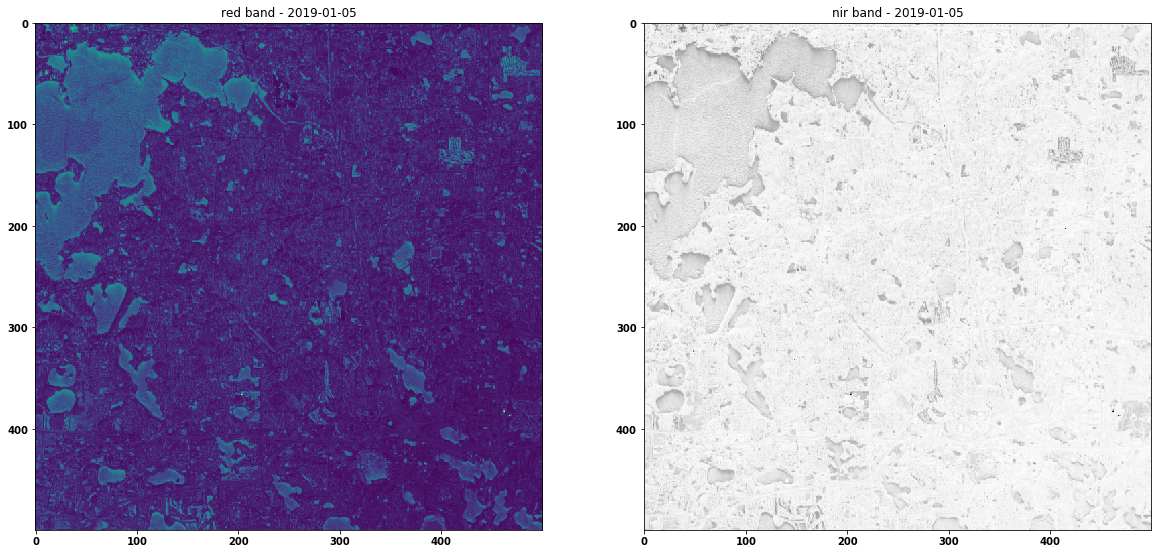

In [435]:
print ('Plotting the red and nir bans for 2019-01-05 imagery')
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(red)
plt.title('red band - 2019-01-05')

plt.subplot(1, 2, 2)
plt.imshow(nir, cmap=plt.cm.Greys)
plt.title('nir band - 2019-01-05');

In [436]:
'''Snetinel-2 Imagery NDVI Analysis''' 

'Snetinel-2 Imagery NDVI Analysis'

In [ ]:
# print ('Setting imagery directory')
s2_images = os.listdir('images/')

print ('Creating list to append average mean, max, median and min NDVI values')
meanNDVI = []
maxNDVI = []
medianNDVI = []
minNDVI = []
NDVIdates = []

print ('Appending file path & calculating indivdual NDVI for all 43 imageries')
s2_bands = []
for i in s2_images:
    i = 'images/' + i
    s2_bands.append(i)
    
    #Image band selection for both RED ad NIR bands
    with rasterio.open(i) as f:
        red = f.read(1)
    with rasterio.open(i) as f:
        nir = f.read(2)
    
    #In python division of integers leads to integers so we need to specify floats in order to get floats
    #NDVI calculation per image
    ndvi = (nir.astype(float)-red.astype(float))/(nir.astype(float)+red.astype(float))
    
    #plotting Individual NDVI images
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.imshow(ndvi, cmap="RdYlGn")
    plt.colorbar(fraction=0.046, pad=0.04)
    NDVIdates.append(i[22:32])
    plt.title(i[22:32] + ' NDVI Calculation') 
    plt.show()
    
    #average of Max, Mean, Median, and Min NDVI across 43 Sentinel-2 Images'
    meanNDVI.append(ndvi.mean())
    maxNDVI.append(ndvi.max())
    medianNDVI.append(np.median(ndvi))
    minNDVI.append(ndvi.min())
    
    # open these files and add all bands to an array
    arrs = []
    for band in s2_bands:
        with rasterio.open(band) as f:
            arrs.append(f.read(1))
            


Plotting a histogram of all imagery and their frequency


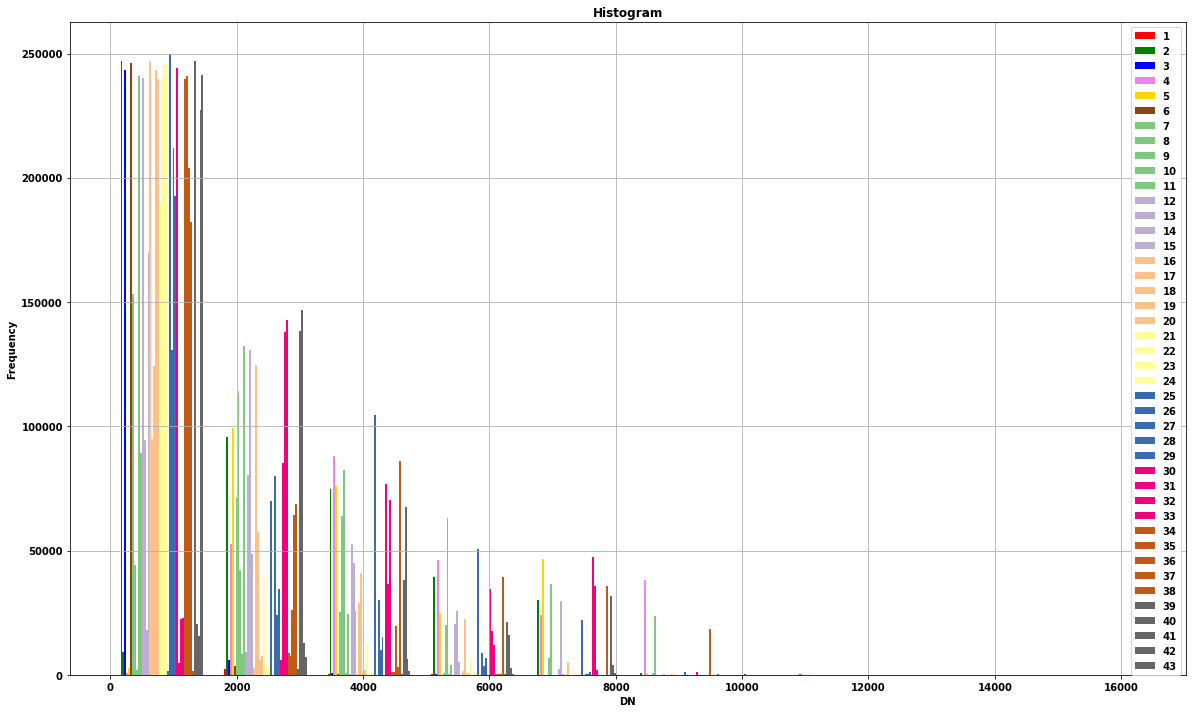

In [438]:
print ('Plotting a histogram of all imagery and their frequency')
#histogram of the data
fig, ax = plt.subplots(figsize=(20,12))
show_hist(sentinel_img, ax=ax)

In [439]:
print('printing numpy array composition')
sentinel_img[:,0,0]

printing numpy array composition


array([ 533, 1942,  498, 2889, 2265,  713, 2528, 1491, 2891, 1027, 2224,
       1312,  519, 1832,  786,  563, 2332,  649,  449,  397,  541,  410,
        515,  374, 2974,    0, 1286,  406,  438, 1983, 1996, 2449, 2656,
        460,  381, 2041, 1244, 2248,  803, 2266, 2717,  417, 1235],
      dtype=uint16)

appending each image path into an number array
ignoring nan values for NDVI calculation across all  
assigning red and nir bands to variables
Calculating NDVI on the combine numpy array contaning all 43 imageries
plotting NDVI imagery across the combined 43 images


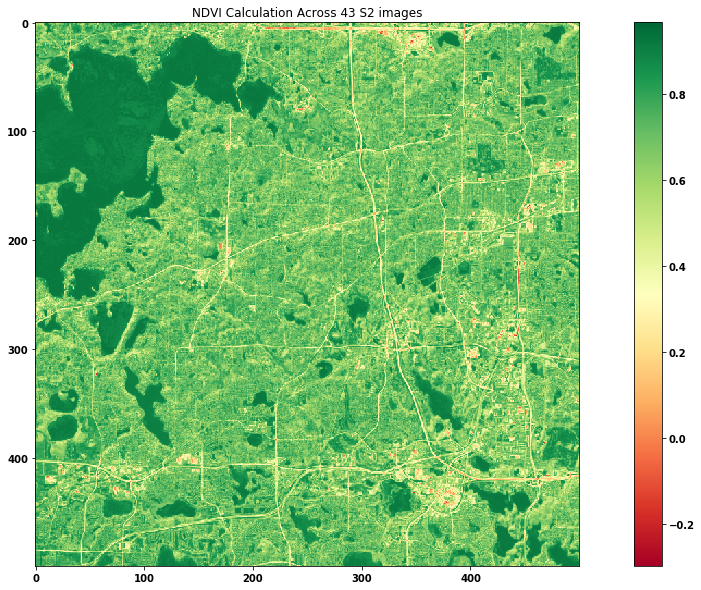

In [440]:
print ('appending each image path into an number array')
#convert the list to a numpy array
sentinel_img = np.array(arrs, dtype=arrs[0].dtype)
#check the shape of this array
sentinel_img.shape

print ('ignoring nan values for NDVI calculation across all  ')
np.seterr(divide='ignore', invalid='ignore')

print ('assigning red and nir bands to variables')
bandRed = sentinel_img[0] # eigth band
bandNIR = sentinel_img[1] # fourth band

print ('Calculating NDVI on the combine numpy array contaning all 43 imageries')
#In python division of integers leads to integers so we need to specify floats in order to get floats
ndvi = (bandNIR.astype(float)-bandRed.astype(float))/(bandNIR.astype(float)+bandRed.astype(float))

print ('plotting NDVI imagery across the combined 43 images')
#normal matrix for all 43 imags calculated from the numpy array sentinel_img
plt.figure(figsize=(20,10))
plt.title('NDVI Calculation Across 43 S2 images');
plt.imshow(ndvi, cmap="RdYlGn")
plt.colorbar()
plt.show()

In [441]:
print ('Calculating max, mean, median and min NDVI values for all 43 images')
print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('Mean NDVI: {m}'.format(m=ndvi.mean()))
print('Median NDVI: {m}'.format(m=np.median(ndvi)))
print('Min NDVI: {m}'.format(m=ndvi.min()))

Calculating max, mean, median and min NDVI values for all 43 images

Max NDVI: 0.9678585777420651
Mean NDVI: 0.7034083353725836
Median NDVI: 0.7073682637321146
Min NDVI: -0.2974963181148748


In [442]:
print ('Printing  the average of Max, Mean, Median, and Min NDVI across 43 Sentinel-2 Images')
print('\nAverage Max NDVI: ', np.nanmean(maxNDVI))
print('Average Mean NDVI: ', np.nanmean(meanNDVI))
print('Average Median NDVI: ', np.nanmean(medianNDVI))
print('Average Min NDVI: ', np.nanmean(minNDVI))

Printing  the average of Max, Mean, Median, and Min NDVI across 43 Sentinel-2 Images

Average Max NDVI:  0.7067394839962414
Average Mean NDVI:  0.2174871451123512
Average Median NDVI:  0.24731499726291745
Average Min NDVI:  -0.32563038711980197


Plotting max, mean, median and min NDVI values for each imagery


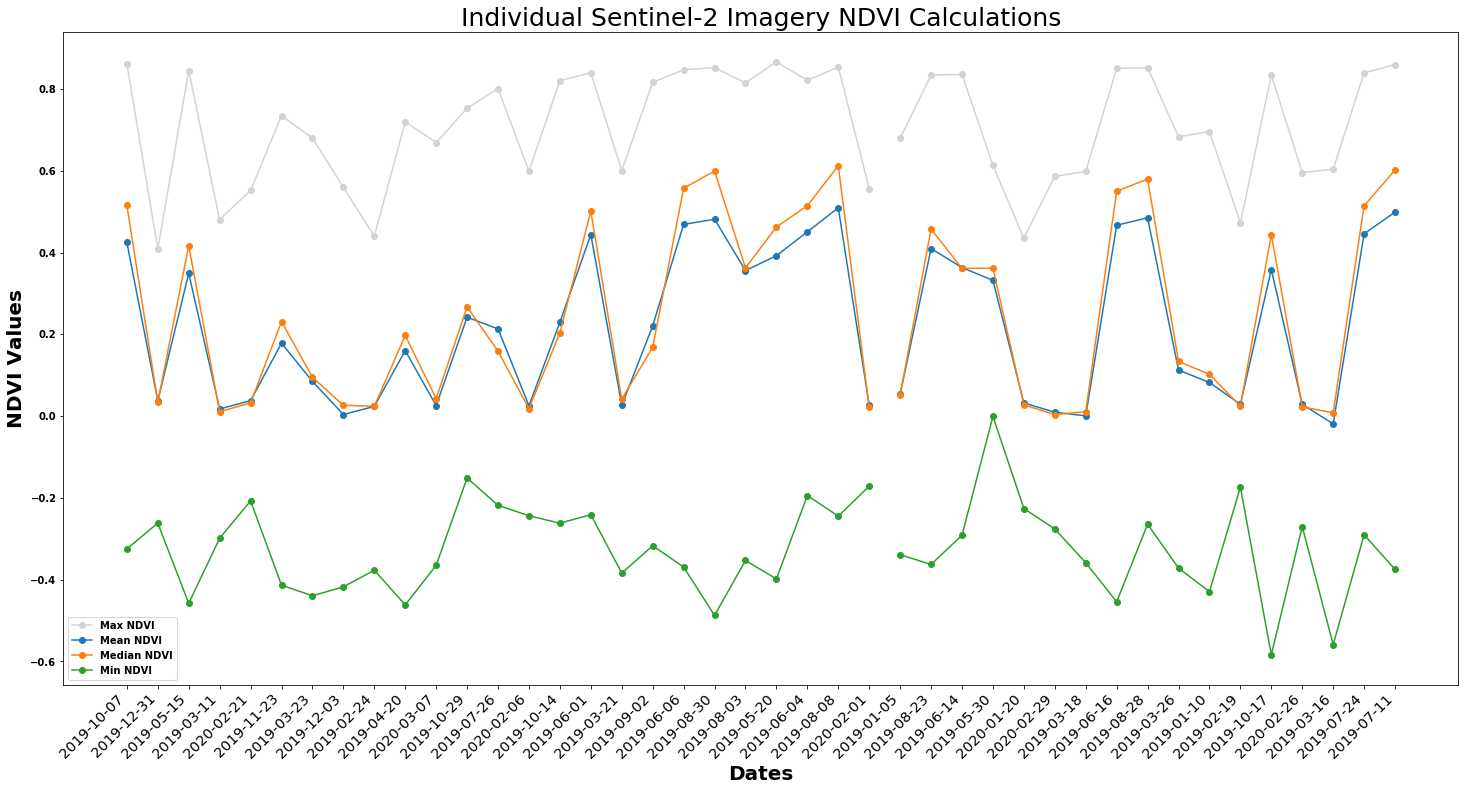

In [443]:
print ('Plotting max, mean, median and min NDVI values for each imagery')
fig, ax = plt.subplots(figsize=(25,12))

plt.plot(NDVIdates, maxNDVI, 'o-', color='lightgrey', label='Max NDVI')
plt.plot(NDVIdates, meanNDVI, 'o-', label='Mean NDVI')
plt.plot(NDVIdates, medianNDVI, 'o-', label='Median NDVI')
plt.plot(NDVIdates, minNDVI, 'o-', label='Min NDVI')

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel("Dates", fontsize=20)
plt.ylabel("NDVI Values", fontsize=20)
#plt.legend(loc='center')

plt.legend()
plt.title('Individual Sentinel-2 Imagery NDVI Calculations', fontsize=25)
plt.show()